# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [4]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


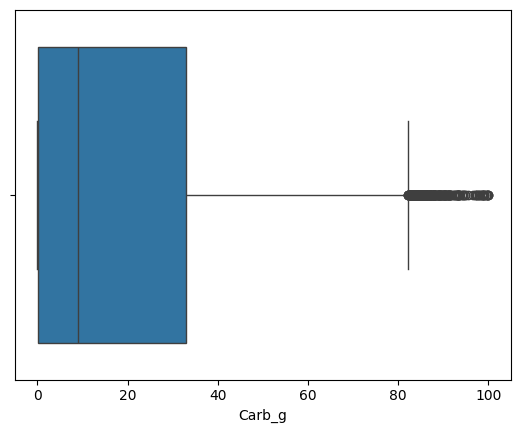

In [6]:
sns.boxplot(df, x="Carb_g");

<Axes: xlabel='Sugar_g'>

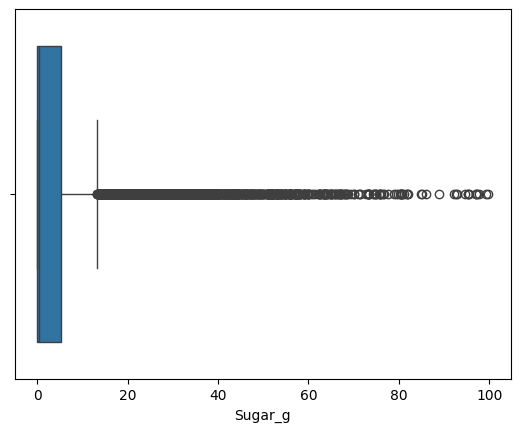

In [7]:
sns.boxplot(df, x="Sugar_g")

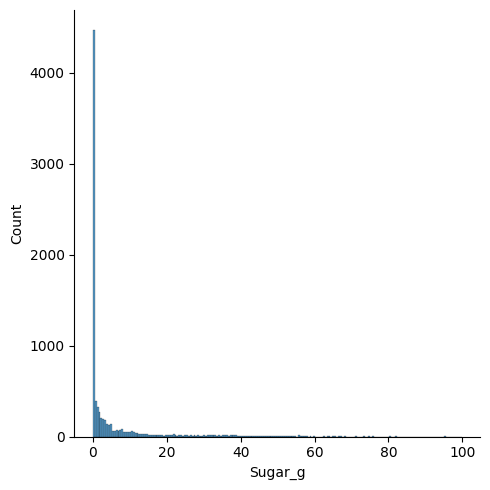

In [8]:
sns.displot(df, x="Sugar_g")

In [9]:
df_outliers = df[['Carb_g', 'Sugar_g']]
df_outliers

,Carb_g,Sugar_g
0,0.06,0.06
1,0.06,0.06
2,0.00,0.00
3,2.34,0.50
4,2.79,0.51
...,...,...
8613,0.00,0.00
8614,5.41,0.00
8615,73.14,73.20
8616,2.00,0.00


Eliminamos los valores anómalos de `Carb_g` y `Sugar_g`

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

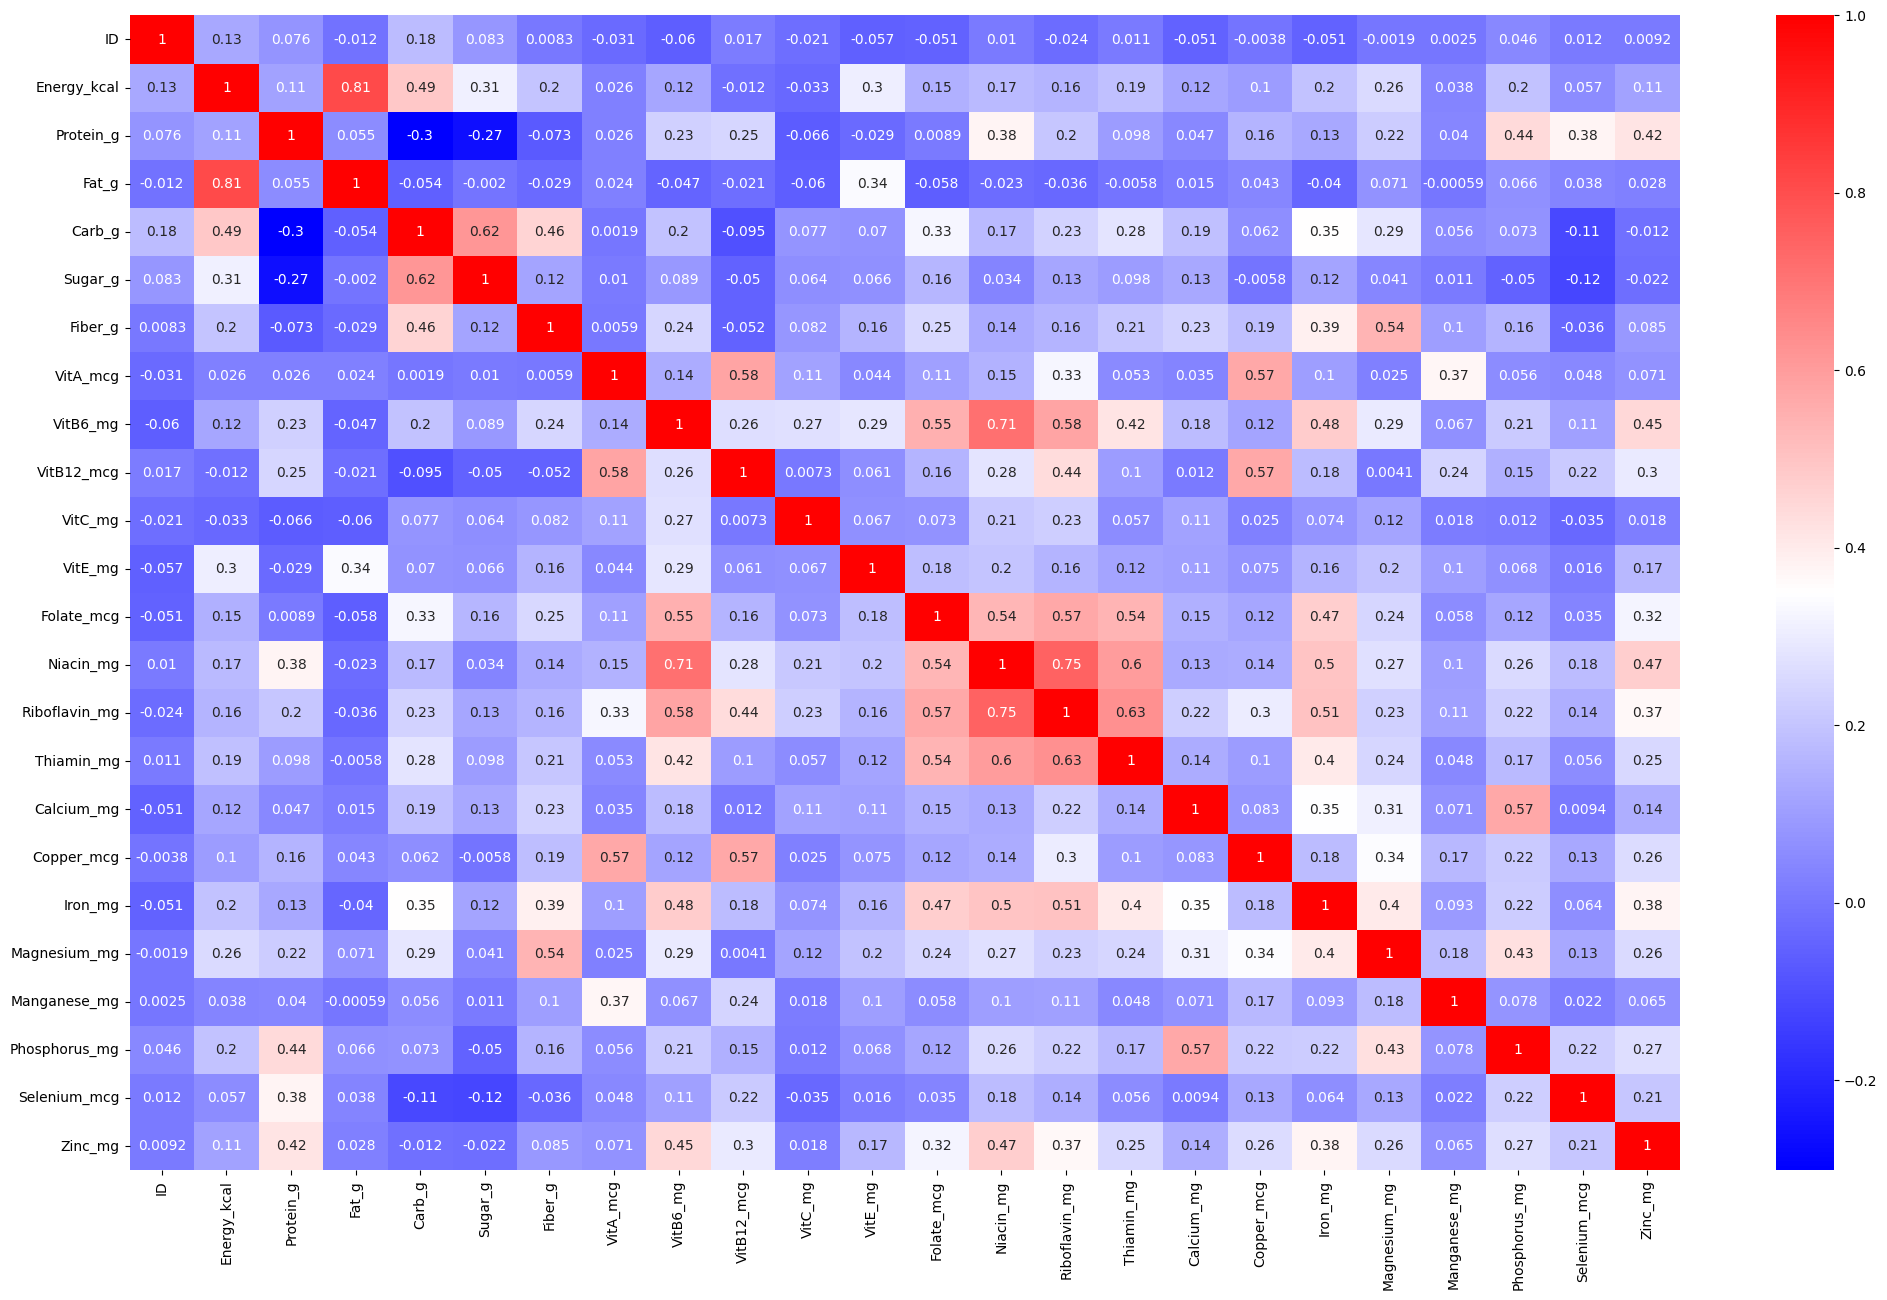

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), cmap='bwr', annot=True);

In [11]:
df.columns[df.columns.str.contains("USRDA")]

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [12]:
df.drop(columns=df.columns[df.columns.str.contains("USRDA")], inplace=True)
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Variables no numéricas
Elimina las variables de texto del dataset

In [15]:
# Obtener una lista de columnas de tipo object o el tipo que se quiera
columnas_object = df.select_dtypes(include=['object', 'int']).columns.tolist()

# Eliminar las columnas de tipo object e int ya que está el id que no necesitamos
df = df.drop(columns=columnas_object)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

In [16]:
len(df.columns)

23

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

<Axes: >

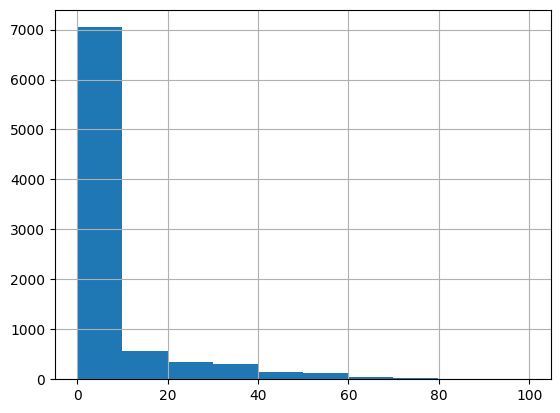

In [17]:
df['Sugar_g'].hist()

In [18]:
from scipy import stats

print(stats.skew(df['Energy_kcal']))
print(stats.skew(df['Sugar_g']))

1.1680394209139597
2.9528103557537357


In [19]:
for col in df.columns:
    df[col] = np.log1p(df[col])

<Axes: >

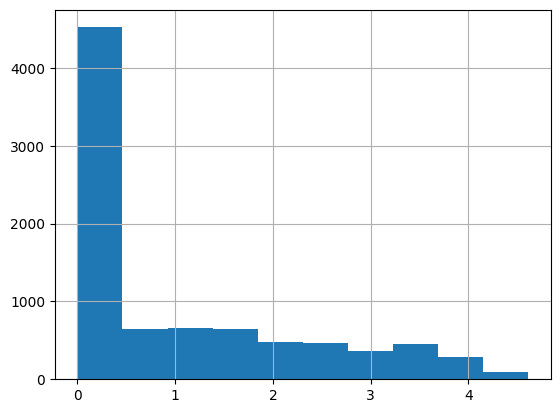

In [20]:
df['Sugar_g'].hist()

In [21]:
stats.skew(df['Sugar_g'])

1.0034222288460226

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [22]:
X = StandardScaler()
df_scaled = X.fit_transform(df)
df_scaled

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [23]:
df_scaled.shape

(8618, 23)

In [24]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-2.13903189, -0.96801891, -1.46398817, ...,  0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144, -1.48058025, ...,  0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955, -2.04233529, ..., -0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526, -1.24206984, ...,  0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408,  0.80512618, ...,  0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203,  1.59197004, ...,  0.34724908,
         0.3352501 , -0.52011023]])

In [25]:
pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [-5.22265271e-01, -7.90226661e-02, -4.73911046e-01,
        -2.10881292e-01, -1.8

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [26]:
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [27]:
# PRIMERA FORMA 01
pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24))


1     0.312511
2     0.479176
3     0.564498
4     0.635616
5     0.694661
6     0.739539
7     0.770334
8     0.797521
9     0.822894
10    0.845517
11    0.867463
12    0.886517
13    0.905043
14    0.919368
15    0.932865
16    0.945844
17    0.957046
18    0.966791
19    0.976087
20    0.983556
21    0.990496
22    0.996158
23    1.000000
dtype: float64

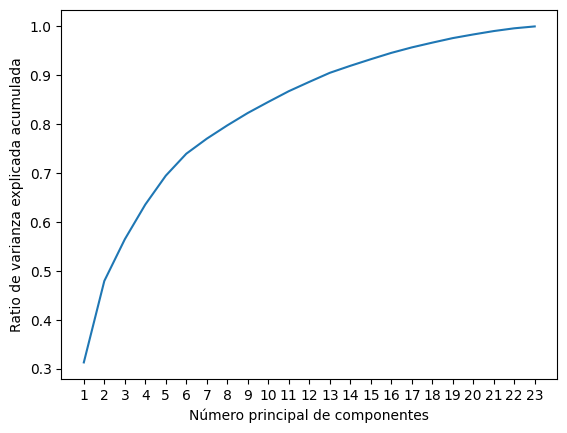

In [28]:
# PRIMERA FORMA 02

plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24)))
plt.xlabel('Número principal de componentes')
plt.ylabel('Ratio de varianza explicada acumulada')
plt.xticks(np.arange(1,24));

In [29]:
# SEGUNDA FORMA 01

grafico = pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24))
grafico

1     0.312511
2     0.479176
3     0.564498
4     0.635616
5     0.694661
6     0.739539
7     0.770334
8     0.797521
9     0.822894
10    0.845517
11    0.867463
12    0.886517
13    0.905043
14    0.919368
15    0.932865
16    0.945844
17    0.957046
18    0.966791
19    0.976087
20    0.983556
21    0.990496
22    0.996158
23    1.000000
dtype: float64

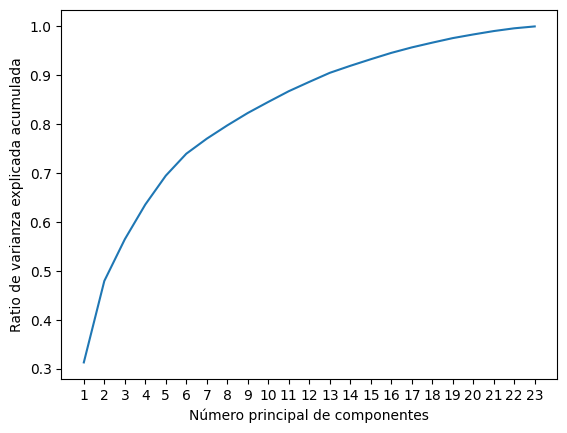

In [30]:
# SEGUNDA FORMA 02

plt.plot(grafico)
plt.xlabel('Número principal de componentes')
plt.ylabel('Ratio de varianza explicada acumulada')
plt.xticks(np.arange(1,24));

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [31]:
df_scaled.shape

(8618, 23)

In [32]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(df_scaled)
X_pca6.shape

(8618, 6)

In [33]:
df_pca_comp = pd.DataFrame(pca6.components_, columns= df.columns, index=('PC1','PC2','PC3','PC4','PC5','PC6'))
df_pca_comp

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320254,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,-0.522264,-0.079027,-0.473914,-0.210878,-0.184207,-0.136177,0.292310,0.159106,0.185999,0.394603,...,0.096966,-0.057947,0.093719,0.040044,-0.039005,0.073292,-0.029156,0.016407,0.062527,0.039192
PC4,0.064246,-0.132032,0.032892,0.038031,0.281254,-0.081258,0.086508,0.312451,0.232656,0.153338,...,0.352769,0.307077,-0.208678,-0.270558,0.124239,-0.319882,-0.327242,-0.230514,-0.164439,-0.026435
PC5,0.148403,-0.075021,0.335133,-0.095012,0.089665,-0.196297,0.544578,-0.071833,0.078476,0.127914,...,-0.046779,-0.220283,0.212855,0.008519,-0.181731,-0.044446,-0.074178,0.010944,0.095390,-0.052055
PC6,-0.056390,-0.130048,0.031923,-0.195761,-0.232597,0.056810,-0.221010,0.151960,0.055371,0.104910,...,-0.032613,-0.001333,-0.440448,0.404951,0.041884,-0.096250,0.353732,-0.273706,-0.079348,0.095267


In [34]:
df_model = pd.DataFrame(X_pca6, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_model

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,-1.463968,0.270807,4.067224,0.307165
1,-2.106485,-0.909502,-1.480573,0.263223,4.032601,0.348544
2,-3.267830,-1.138429,-2.042329,1.175425,4.071542,1.326399
3,1.525964,-1.264101,0.136029,-0.929782,2.430882,-2.094981
4,1.240711,-1.204117,0.004842,-1.192407,2.692388,-2.341967
...,...,...,...,...,...,...
8613,2.553660,-2.548702,0.472292,-0.110002,2.717654,0.019158
8614,0.075017,-1.840920,0.935886,-1.349635,-0.391528,-0.759546
8615,-2.930530,1.664407,-1.242032,1.172101,-0.916261,-0.886278
8616,1.118895,-0.780830,0.805229,-1.582408,1.641367,1.089709


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [35]:
df_last = pd.read_csv('data/nndb_flat.csv')
df_last

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [36]:
df_model['FoodGroup'] = df_last['FoodGroup']
df_model

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
0,-2.139032,-0.968019,-1.463968,0.270807,4.067224,0.307165,Dairy and Egg Products
1,-2.106485,-0.909502,-1.480573,0.263223,4.032601,0.348544,Dairy and Egg Products
2,-3.267830,-1.138429,-2.042329,1.175425,4.071542,1.326399,Dairy and Egg Products
3,1.525964,-1.264101,0.136029,-0.929782,2.430882,-2.094981,Dairy and Egg Products
4,1.240711,-1.204117,0.004842,-1.192407,2.692388,-2.341967,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,2.553660,-2.548702,0.472292,-0.110002,2.717654,0.019158,Finfish and Shellfish Products
8614,0.075017,-1.840920,0.935886,-1.349635,-0.391528,-0.759546,Finfish and Shellfish Products
8615,-2.930530,1.664407,-1.242032,1.172101,-0.916261,-0.886278,Sweets
8616,1.118895,-0.780830,0.805229,-1.582408,1.641367,1.089709,Finfish and Shellfish Products


In [37]:
df_model.groupby('FoodGroup').mean().sort_values(by=['PC1'], ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6
FoodGroup,,,,,,
Breakfast Cereals,4.020261,2.748076,0.236187,2.264984,-0.907382,-0.108414
Nut and Seed Products,3.120685,2.267571,-1.241546,-2.092991,0.083526,1.762407
Spices and Herbs,2.562117,3.647736,0.361836,-1.602720,-0.232101,1.460798
Snacks,1.874997,1.962743,-1.081969,-0.497623,0.442982,0.373047
Beef Products,1.674406,-2.753705,0.149174,0.038128,-0.191992,0.280822
"Lamb, Veal, and Game Products",1.472704,-2.532165,0.120846,0.015499,-0.249124,0.280010
Poultry Products,1.407736,-2.164593,0.502911,-0.072118,0.255164,-0.149836
Pork Products,1.360204,-2.216459,-0.099250,0.356230,-0.424787,-0.014367
Finfish and Shellfish Products,1.101115,-1.859387,1.247989,-0.720290,0.707178,-0.215882
